In [1]:
import xarray as xr 
import zarr

In [2]:
# Set up a local cluster for distributed computing.
from distributed import LocalCluster

cluster = LocalCluster()
client = cluster.get_client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 32.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35553,Workers: 0
Dashboard: http://127.0.0.1:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:33529,Total threads: 2
Dashboard: http://127.0.0.1:45925/status,Memory: 8.00 GiB
Nanny: tcp://127.0.0.1:40221,


In [ ]:
ds = xr.open_mfdataset("WW3_201*.zarr",engine='zarr',consolidated=True)
to eosc

In [7]:
ds = xr.open_mfdataset("WW3_201*.zarr",engine='zarr',consolidated=True)
ds=ds.sel(time=slice('2014-10-01','2015-04-01'))

In [8]:
bbox_manche= {"latitude": [48.5,52], "longitude": [-5.5,2]}

In [13]:
f_manche = ds_manche["hs"].resample(time="2D").max().compute()#.sel(time=ds_manche["time"].dt.month.isin([2])).compute()
f_manche


<xarray.DataArray 'hs' (time: 92, latitude: 8, longitude: 16)> Size: 94kB
array([[[3.47800017, 3.02800014,        nan, ...,        nan,
                nan,        nan],
        [3.05400015, 2.81000013, 2.60200012, ...,        nan,
                nan,        nan],
        [2.52200012, 2.32400011, 2.0480001 , ...,        nan,
                nan,        nan],
        ...,
        [1.76200008, 1.70400008, 1.34200006, ...,        nan,
         0.71800003, 0.63000003],
        [1.67800008, 1.59800008, 1.50600007, ..., 0.42200002,
         0.68200003, 0.83800004],
        [1.60600008, 1.45800007,        nan, ...,        nan,
         0.65600003, 0.99400005]],

       [[3.09600015, 2.84400014,        nan, ...,        nan,
                nan,        nan],
        [2.97200014, 2.87400014, 2.76000013, ...,        nan,
                nan,        nan],
        [2.91400014, 2.81400013, 2.56800012, ...,        nan,
                nan,        nan],
...
        [6.3240003 , 6.2360003 , 4.86400023, ...,        nan,
         2.95600014, 2.74400013],
        [5.81600028, 5.50600026, 5.04600024, ..., 1.32400006,
         2.48600012, 3.07400015],
        [4.84000023, 4.32000021,        nan, ...,        nan,
         2.0520001 , 2.93600014]],

       [[4.47000021, 4.2600002 ,        nan, ...,        nan,
                nan,        nan],
        [4.40200021, 4.39600021, 4.36200021, ...,        nan,
                nan,        nan],
        [4.2040002 , 4.1960002 , 3.97600019, ...,        nan,
                nan,        nan],
        ...,
        [3.54000017, 3.64200017, 2.98600014, ...,        nan,
         1.49000007, 1.79600009],
        [2.96800014, 2.97600014, 2.76600013, ..., 1.01800005,
         1.85200009, 2.34800011],
        [2.39200011, 2.52200012,        nan, ...,        nan,
         1.29200006, 2.1320001 ]]], shape=(92, 8, 16))
Coordinates:
  * latitude   (latitude) float32 32B 48.5 49.0 49.5 50.0 50.5 51.0 51.5 52.0
  * longitude  (longitude) float32 64B -5.5 -5.0 -4.5 -4.0 ... 0.5 1.0 1.5 2.0
  * time       (time) datetime64[ns] 736B 2014-10-01 2014-10-03 ... 2015-04-01
Attributes:
    globwave_name:  significant_wave_height
    grid_mapping:   crs
    long_name:      significant height of wind and swell waves
    standard_name:  sea_surface_wave_significant_height
    units:          m
    valid_max:      32000
    valid_min:      0

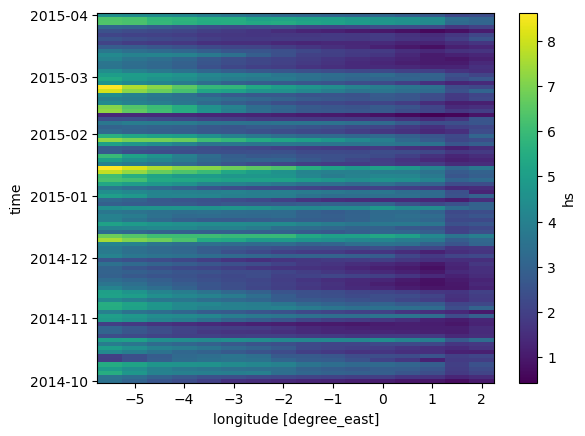

In [14]:
f_manche.max(dim='latitude').plot(y='time',x='longitude')